In [1]:
import  sys
sys.path.append('../')
import  latexStrings  as ls
from IPython.display import Latex
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pdesolver

# Ejercicio 1

Dada la ecuacion del calor, tenemos el PVIF:

\begin{equation}\label{eq:1}
u_t = \frac{1}{\pi}u_{xx}
\end{equation}

Con las condiciones:
\begin{empheq}[left=\empheqlbrace]{align}
    u(x,0) &= sin(\pi x) &\text{para } 0\leq x \leq 1 \label{eq:2}\\
    u(0,t) &= 0 &\text{para } 0\leq t \leq 1 \label{eq:3}\\
    u_x(1,t) &= -\pi e^{-\pi x} &\text{para } 0\leq t \leq 1 \label{eq:4}
\end{empheq}

Notamos que (\ref{eq:2}) nos da las condiciones iniciales para $x$, mientras que para $t$ tenemos condiciones de frontera (\ref{eq:3}) Dirichlet en la izquierda y (\ref{eq:4}) Neumann por la derecha. Ademas, sabemos que la solucion exacta es:

\begin{equation}\label{eq:5}
u(t, x) = e^{-\pi t}\sin(\pi x)
\end{equation}

Entonces podemos escribir nuestro problema como:

In [2]:
u = lambda x, t: np.exp(-np.pi*t)*np.sin(np.pi*x)
eq= {}
eq['D'] = 1/np.pi
eq['ic'] = lambda x : np.sin(np.pi*x)
eq['bcL'] = lambda t : 0
eq['bcR'] = lambda t : -np.pi*np.exp(-np.pi*t)
Ix = [0, 1]
It = [0, 1]

-----Justificar maximo paso teorico para h = 1/20 ----

Ahora apliquemos el metodo explicito con 20 pasos en el espacio ($h = 1/20$) y 256 pasos en el tiempo ($k = 1/256$), y veamos el maximo de los errores al tiempo $T = 1$:

In [3]:
M = 20
N = 256

W, X, T = pdesolver.explicitHeat(eq, Ix, It, M, N)
U = np.array([[u(x,t) for t in T] for x in X])
Error = max(abs(U[:,256]-W[:,256]))
Latex('Maximo Error en $T=1$: '+ str(Error))

<IPython.core.display.Latex object>

Finalmente, veamos como se ven graficamente la solucion exacta, asi como la aproximada:

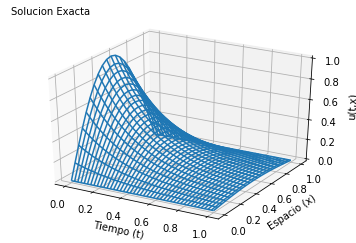

In [4]:
MeshT, MeshX = np.meshgrid(T, X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(MeshT, MeshX, U)

ax.text2D(0, 1, "Solucion Exacta", transform=ax.transAxes)
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Espacio (x)')
ax.set_zlabel('u(t,x)')

plt.show()

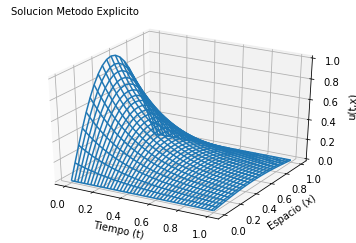

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(MeshT, MeshX, W)

ax.text2D(0, 1, "Solucion Metodo Explicito", transform=ax.transAxes)
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Espacio (x)')
ax.set_zlabel('u(t,x)')

plt.show()